Required Libraries :

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

Reading CSV  the file " Telcomchurn.csv"

In [24]:
Telcom=pd.read_csv("Telcomchurn.csv")
Telcom.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


######Customer Churn Prediction ####

I can now construct a predictive model to assist the telecom business in identifying the possibility of churn and performing an intervention / program to prevent churn after examining and evaluating the available data.


To prepare the data for modeling, I first separated it into input and target feature sets.

In [27]:
X=df.drop('Churn', axis=1)
y=df['Churn']

Next, I obtain dummies for categorical data in order to include them in machine learning model procedures.

In [28]:
X = pd.get_dummies(X,drop_first=True)

I split the data into train and test runs so that it can be used to both train and validate a model.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create a random forest model with the best settings and evaluate its accuracy/metrics.

In [39]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [40]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [41]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
model_dt.score(x_test,y_test)

0.7882018479033405

In [43]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1018
           1       0.65      0.50      0.57       389

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



As you can see, the accuracy is rather poor, and because it's an unbalanced dataset, we shouldn't use Accuracy to test the model because Accuracy is cursed in imbalanced datasets.
As a result, we must examine the recall, precision, and f1 scores for the minority class, and it is clear that the precision, recall, and f1 scores are too low for Class 1, i.e. churned consumers.
As a result, we'll name it SMOTEENN (UpSampling + ENN).

In [48]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [49]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [50]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [99]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9058704453441295
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       432
           1       0.90      0.94      0.92       556

    accuracy                           0.91       988
   macro avg       0.91      0.90      0.90       988
weighted avg       0.91      0.91      0.91       988



Now we have far better results, with an accuracy of 91% and a very strong recall, precision, and f1 score for the minority class.
Let's try a different classification.

############### Random Forest ####################

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [56]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [57]:
y_pred=model_rf.predict(x_test)

In [58]:
model_rf.score(x_test,y_test)

0.7981520966595593

In [59]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1018
           1       0.72      0.44      0.55       389

    accuracy                           0.80      1407
   macro avg       0.77      0.69      0.71      1407
weighted avg       0.79      0.80      0.78      1407



In [61]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [62]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [63]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [64]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [65]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [66]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [67]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9035532994923858
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       442
           1       0.89      0.94      0.92       543

    accuracy                           0.90       985
   macro avg       0.91      0.90      0.90       985
weighted avg       0.90      0.90      0.90       985



In [68]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[377  65]
 [ 30 513]]


In [69]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [70]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [71]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [72]:
yr_predict_pca = model.predict(xr_test_pca)

In [73]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [74]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7380710659898477
              precision    recall  f1-score   support

           0       0.82      0.53      0.64       442
           1       0.70      0.91      0.79       543

    accuracy                           0.74       985
   macro avg       0.76      0.72      0.72       985
weighted avg       0.76      0.74      0.73       985



KNN

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
import seaborn as sns

c:\Users\Bhavani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1500x500 with 0 Axes>

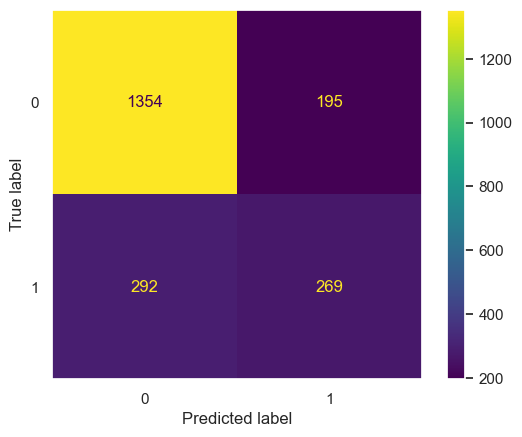

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
param_grid_knn = {'n_neighbors':[2,5,7,10]}
grid_knn = GridSearchCV(knn_clf,param_grid_knn)
grid_knn.fit(scaled_X_train,y_train)

grid_knn.best_params_
# {'n_neighbors': 7}

knn_preds = grid_knn.predict(scaled_X_test)

plt.figure(figsize=(15,5))
plot_confusion_matrix(grid_knn,scaled_X_test,y_test)
plt.grid(False)
sns.set(rc={'figure.facecolor':'white'})

In [105]:
print(classification_report(y_test,knn_preds))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1549
           1       0.58      0.48      0.52       561

    accuracy                           0.77      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110



The KNN model performs slightly worse than our other two models.

Conclusion:


A random forest or Decision tree  model may forecast customer attrition with 91% accuracy based on the models performed.

According to our EDA, contract type appears to be relevant in forecasting churn. Customers on month-to-month plans, in particular, are more prone to churn than other contract types, particularly those who have had contracts for 0-12 months.

Now we are choosing Random tree classifer for our model .

In [106]:
import pickle

In [107]:
filename = 'model.sav'

In [112]:
pickle.dump(model_dt_smote, open(filename, 'wb'))

In [109]:
load_model = pickle.load(open(filename, 'rb'))

In [123]:
model_score_r = load_model.score(xr_test, yr_test)

In [133]:
model_score_r1

0.9035532994923858